بسم الله

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/climate-change-impact-on-agriculture/climate_change_impact_on_agriculture_2024.csv')
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [3]:
df.tail()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
9995,2022,France,Nouvelle-Aquitaine,Cotton,30.48,685.93,17.64,3.033,9,27.56,41.96,10.95,43.41,No Adaptation,1483.06
9996,1999,Australia,Queensland,Soybeans,9.53,2560.38,10.68,2.560,4,77.02,5.45,82.32,59.39,No Adaptation,829.61
9997,2000,Argentina,Patagonia,Coffee,31.92,357.76,26.01,1.161,10,78.53,11.94,26.00,41.46,Water Management,155.99
9998,1996,Brazil,Southeast,Soybeans,13.95,1549.52,17.31,3.348,2,42.65,44.71,25.07,75.10,Crop Rotation,1613.90
9999,2015,China,South,Corn,11.78,1676.25,5.34,3.710,5,46.41,48.28,98.27,59.38,Water Management,453.14


In [4]:
df.shape

(10000, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2007.088700,10.084245,1990.00,1999.0000,2007.000,2016.0000,2024.00
Average_Temperature_C,10000.0,15.241299,11.466955,-4.99,5.4300,15.175,25.3400,35.00
Total_Precipitation_mm,10000.0,1611.663834,805.016815,200.15,925.6975,1611.160,2306.9975,2999.67
CO2_Emissions_MT,10000.0,15.246608,8.589423,0.50,7.7600,15.200,22.8200,30.00
Crop_Yield_MT_per_HA,10000.0,2.240017,0.998342,0.45,1.4490,2.170,2.9300,5.00
Extreme_Weather_Events,10000.0,4.980900,3.165808,0.00,2.0000,5.000,8.0000,10.00
Irrigation_Access_%,10000.0,55.248332,25.988305,10.01,32.6775,55.175,77.5825,99.99
Pesticide_Use_KG_per_HA,10000.0,24.955735,14.490962,0.00,12.5275,24.930,37.4700,49.99
Fertilizer_Use_KG_per_HA,10000.0,49.973708,28.711027,0.01,25.3900,49.635,74.8250,99.99
Soil_Health_Index,10000.0,64.901278,20.195882,30.00,47.2350,64.650,82.4725,100.00


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64

In [9]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined

# اختيار الأعمدة الرقمية فقط
numeric_df = df.select_dtypes(include=[float, int])

# حساب مصفوفة معامل الارتباط
correlation_matrix = numeric_df.corr()

# رسم خريطة حرارية لمصفوفة معامل الارتباط باستخدام Plotly
fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto",
                title='Correlation Matrix',
                color_continuous_scale='RdBu_r')
fig.show()

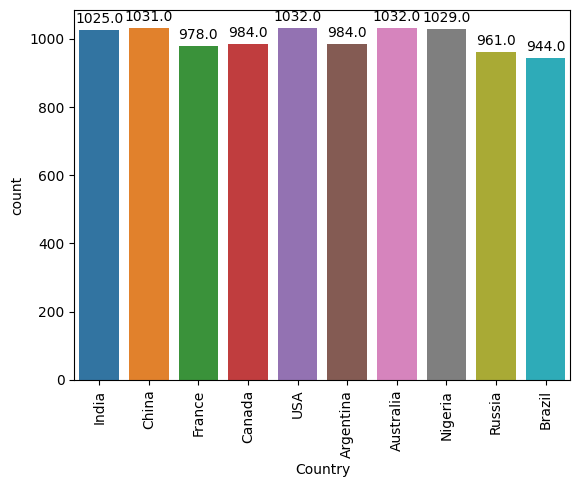

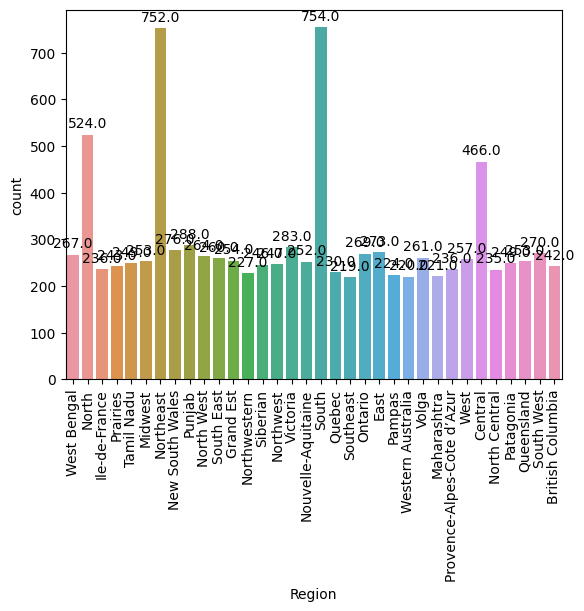

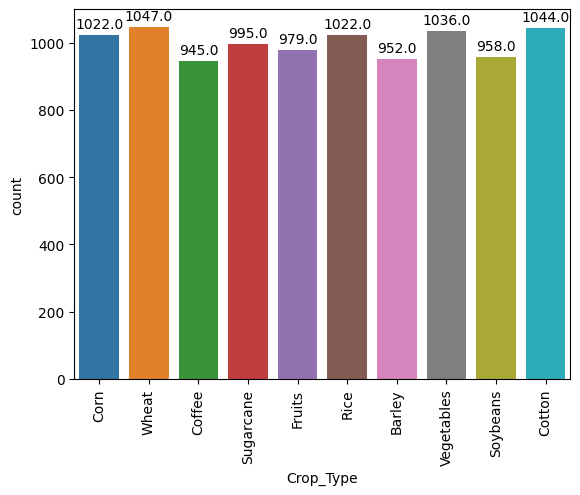

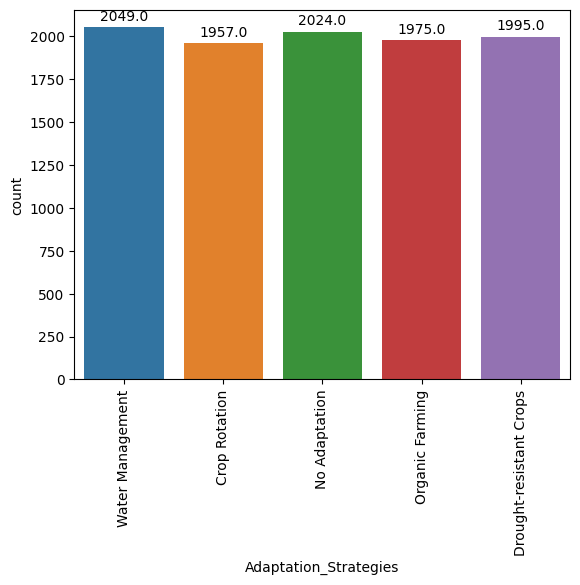

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df:
    if df[col].dtype == 'O':  # التحقق من كون العمود نوع نصي
        ax = sns.countplot(x=col, data=df)  # رسم المخطط
        
        # إضافة القيم فوق كل عمود
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                        textcoords='offset points')
        
        plt.xticks(rotation=90)  # تدوير النص 90 درجة
        plt.show()  # 

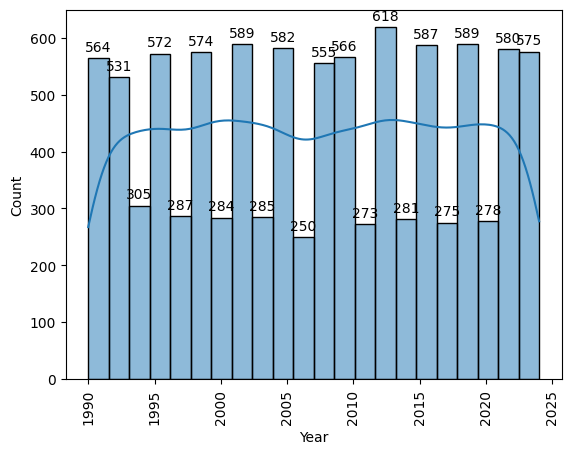

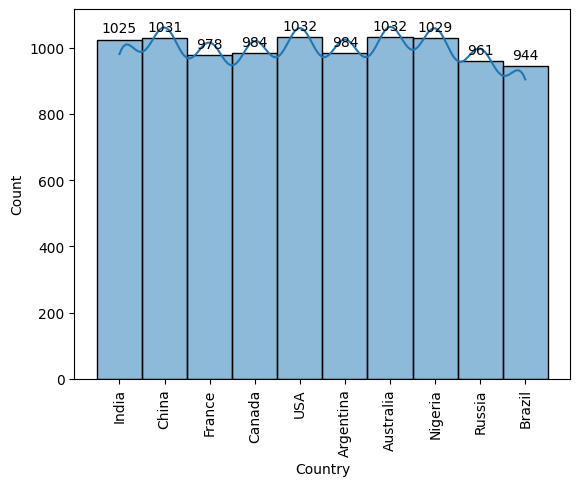

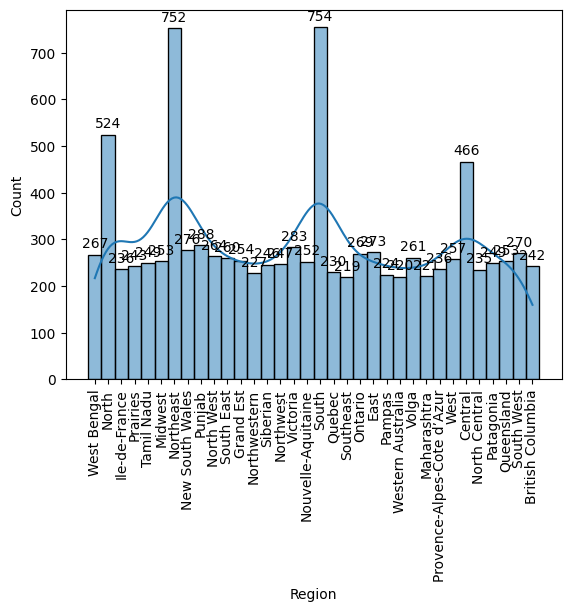

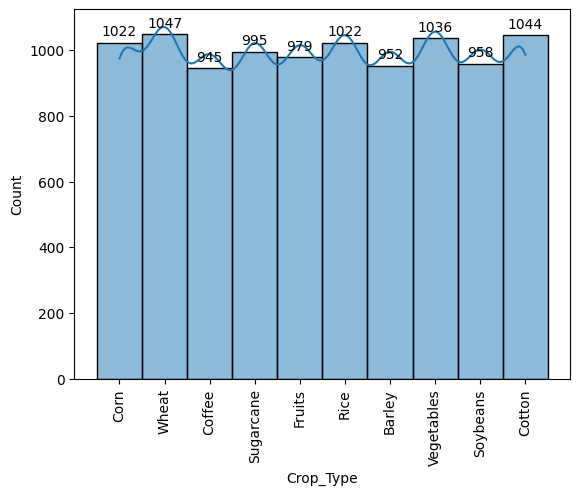

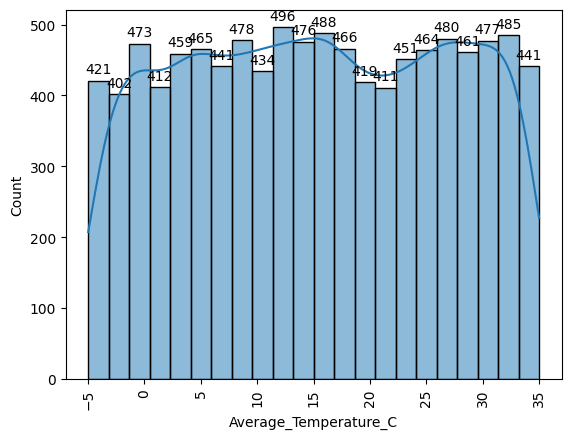

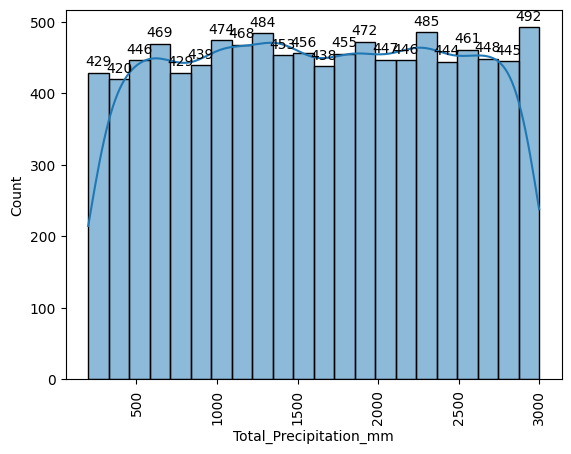

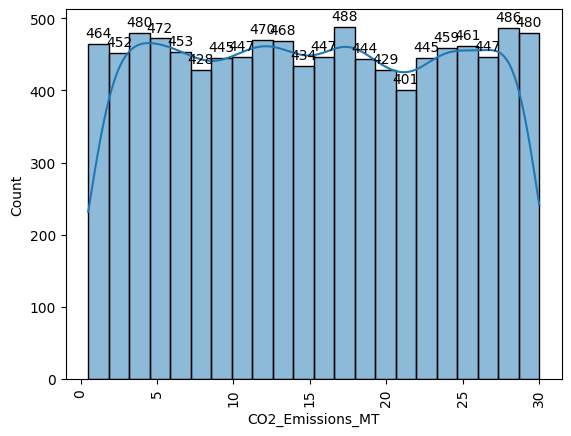

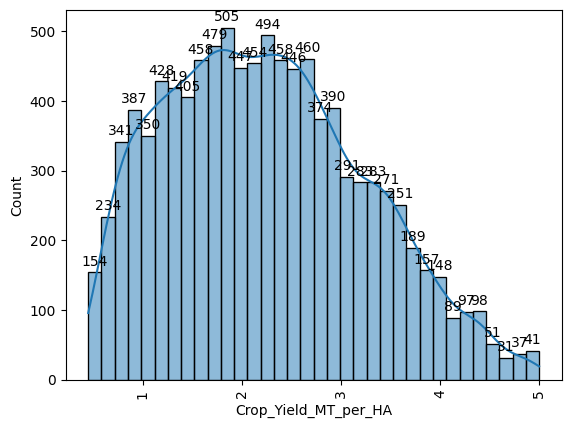

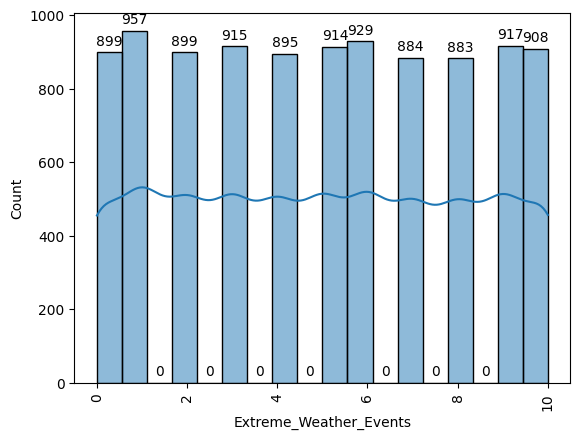

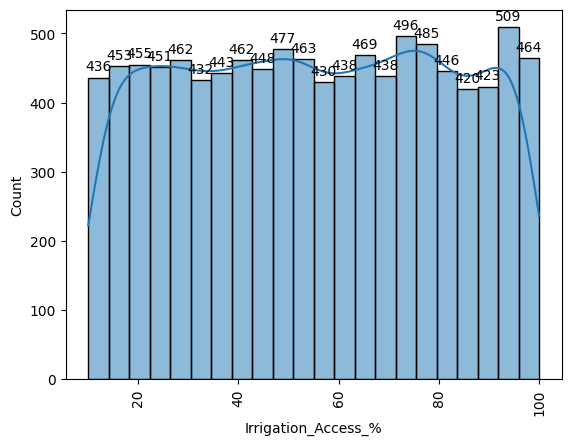

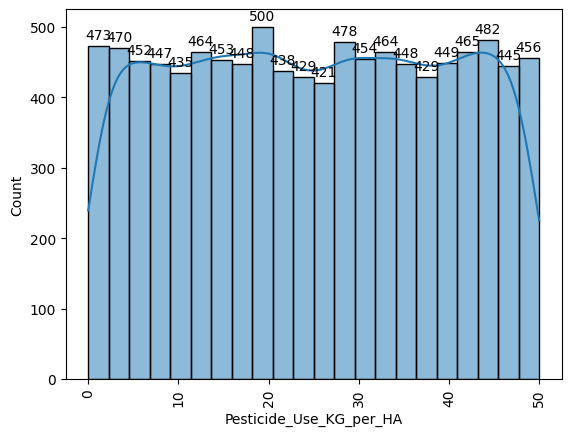

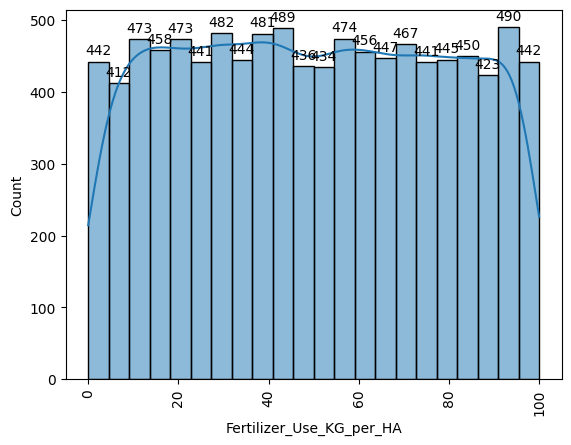

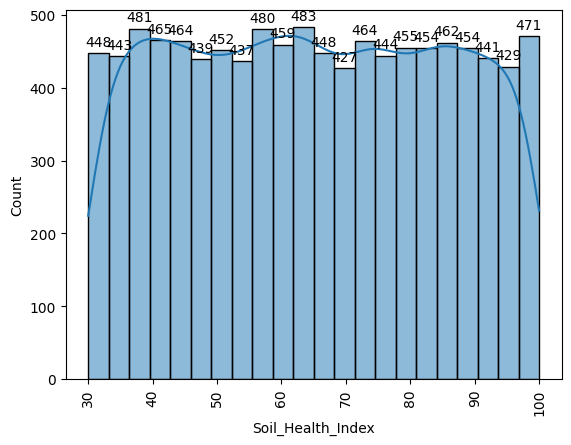

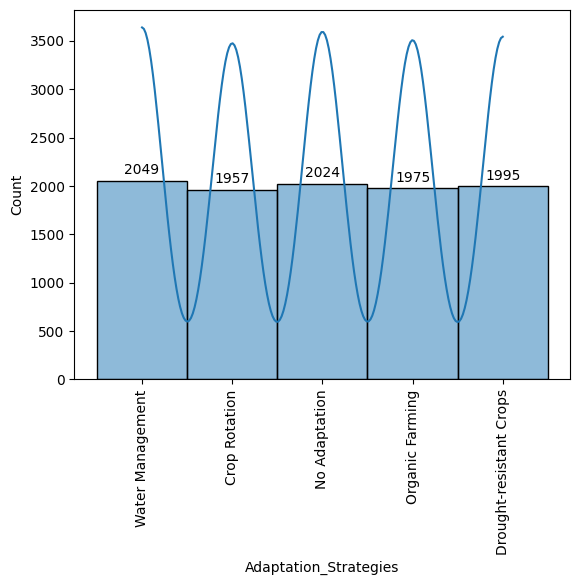

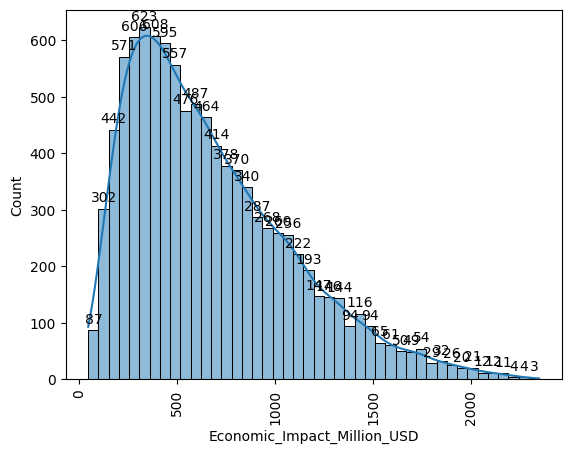

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df:
    ax = sns.histplot(x=col, data=df, kde=True)  # رسم الهيستوغرام مع منحنى الكثافة
    
    # إضافة القيم فوق كل عمود
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',  # تحويل القيمة إلى عدد صحيح لسهولة القراءة
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
    plt.xticks(rotation=90)  # تدوير النص 90 درجة
    plt.show()  # عر

In [12]:
df.columns.tolist()

['Year',
 'Country',
 'Region',
 'Crop_Type',
 'Average_Temperature_C',
 'Total_Precipitation_mm',
 'CO2_Emissions_MT',
 'Crop_Yield_MT_per_HA',
 'Extreme_Weather_Events',
 'Irrigation_Access_%',
 'Pesticide_Use_KG_per_HA',
 'Fertilizer_Use_KG_per_HA',
 'Soil_Health_Index',
 'Adaptation_Strategies',
 'Economic_Impact_Million_USD']

In [13]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns = ['Year',
 'Country',
 'Region',
 'Crop_Type',
 'Average_Temperature_C',
 'Total_Precipitation_mm',
 'CO2_Emissions_MT',
 'Crop_Yield_MT_per_HA',
 'Extreme_Weather_Events',
 'Irrigation_Access_%',
 'Pesticide_Use_KG_per_HA',
 'Fertilizer_Use_KG_per_HA',
 'Soil_Health_Index',
 'Adaptation_Strategies',
 'Economic_Impact_Million_USD']
# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue
        
        # Check if the column is suitable for a bar chart
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']
            
            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='black',  # Background color of the paper
                plot_bgcolor='black',   # Background color of the plot area
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'},
                font=dict(color='white')  # Font color for text in plots
            )
            
            # Show the figure
            fig.show()

        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='black',  # Background color of the paper
                plot_bgcolor='black',   # Background color of the plot area
                title_font=dict(size=18, family="Arial"),
                font=dict(color='white')  # Font color for text in plots
            )
            
            # Show the figure
            fig.show()
    
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

In [14]:
df

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022,France,Nouvelle-Aquitaine,Cotton,30.48,685.93,17.64,3.033,9,27.56,41.96,10.95,43.41,No Adaptation,1483.06
9996,1999,Australia,Queensland,Soybeans,9.53,2560.38,10.68,2.560,4,77.02,5.45,82.32,59.39,No Adaptation,829.61
9997,2000,Argentina,Patagonia,Coffee,31.92,357.76,26.01,1.161,10,78.53,11.94,26.00,41.46,Water Management,155.99
9998,1996,Brazil,Southeast,Soybeans,13.95,1549.52,17.31,3.348,2,42.65,44.71,25.07,75.10,Crop Rotation,1613.90


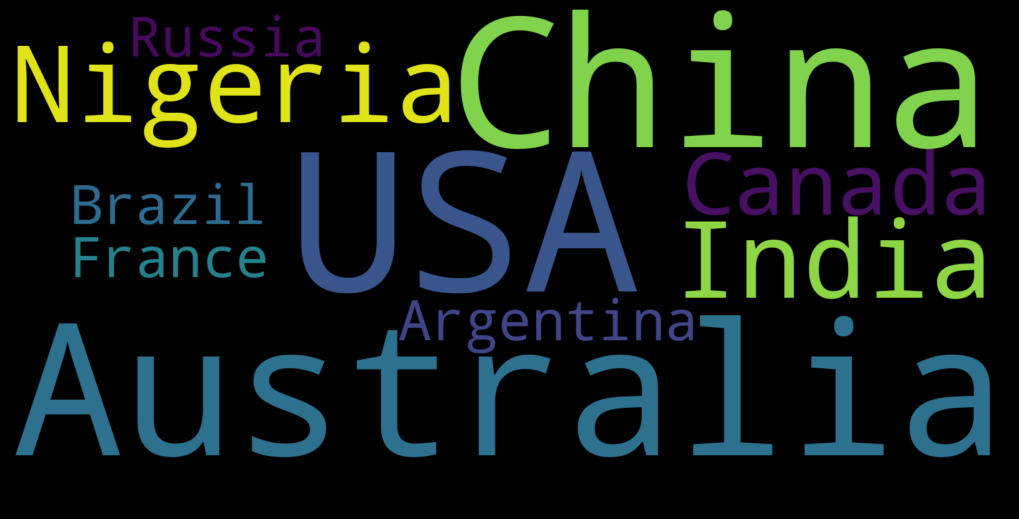

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

# Assuming `dataset` is your DataFrame and `stop_words_list` is a list of stopwords

# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["Country"].dropna().apply(lambda x: str(x)))

# Generate the word cloud
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()